In [1]:
# Cell 1
from google.colab import drive
drive.mount('/content/drive')

# Cell 2
%cd /content/drive/MyDrive/GT_Semester3/Deep\ RL\ \(CS\ 8803\ DRL\)/Project/Dataset

Mounted at /content/drive
/content/drive/MyDrive/GT_Semester3/Deep RL (CS 8803 DRL)/Project/Dataset


In [2]:
%pwd

'/content/drive/MyDrive/GT_Semester3/Deep RL (CS 8803 DRL)/Project/Dataset'

# PyBullet

In [3]:
!pip install pybullet
#https://github.com/BavanthaU/PDE4427_Final_Project

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 21.4 MB/s eta 0:00:00


In [4]:
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

# NOTE: If all your GPUs currently have a memory consumption larger than 1%,
# this step will fail. It's not a bug! It is intended to do so, if it does not
# find an available GPU.
GPUs = GPU.getGPUs()
numGPUs = len(GPU.getGPUs())
print("numGPUs=",numGPUs)
if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if (egl):
    eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  else:
    eglPluginId = p.loadPlugin("eglRendererPlugin")

if eglPluginId>=0:
  print("Using GPU hardware (eglRenderer)")
else:
  print("using CPU renderer (TinyRenderer)")

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=08114e3d37fffa53e389f6b4a17496cb49b0cc60d979a5051fe24687c69e8dda
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
OS: linux
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
| ID | Name | Serial | UUID || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
--------------------------------------------------------------------------------------------------------------------------------------------------
numGPUs= 0
using CPU renderer (TinyRenderer)


In [5]:
import pybullet as p
import pybullet_data

# Reset the simulation and configure the visualizer
p.resetSimulation()
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # Add default PyBullet assets
p.configureDebugVisualizer(p.COV_ENABLE_GUI)

# Fixed base and flags
useFixedBase = False  # Laikago should not have a fixed base for movement
flags = p.URDF_INITIALIZE_SAT_FEATURES

# Load the plane
plane_pos = [0, 0, 0]
plane = p.loadURDF("plane.urdf")

# Load the table at its position
table_pos = [1, 0, 0]  # Move the table to the right of the screen
table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)


init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load the Laikago robot at the center
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

# Simulate physics to let Laikago settle on its legs
p.setGravity(0, 0, -9.8)  # Enable gravity
for _ in range(240):  # Step through the physics simulation
    p.stepSimulation()

# Adjust the camera to center on Laikago
p.resetDebugVisualizerCamera(
    cameraDistance=1.5,  # Adjust distance for a better view
    cameraYaw=0,         # Keep yaw at 0 to face forward
    cameraPitch=-30,     # Slightly tilt the camera down
    cameraTargetPosition=[0, 0, 0]  # Focus on Laikago's position
)




,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

CPU times: user 545 ms, sys: 46 ms, total: 591 ms
Wall time: 583 ms


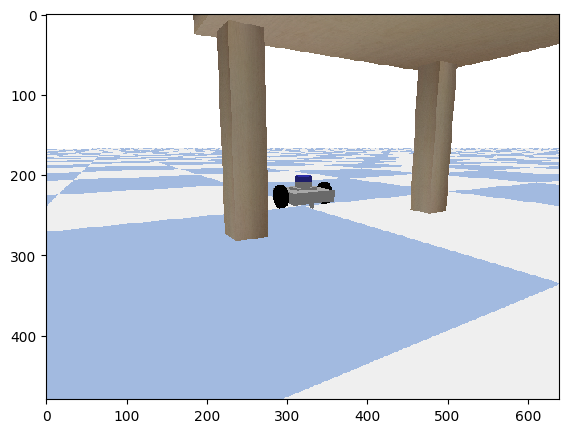

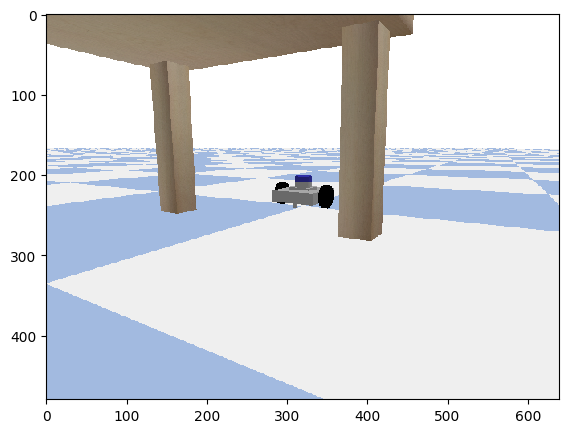

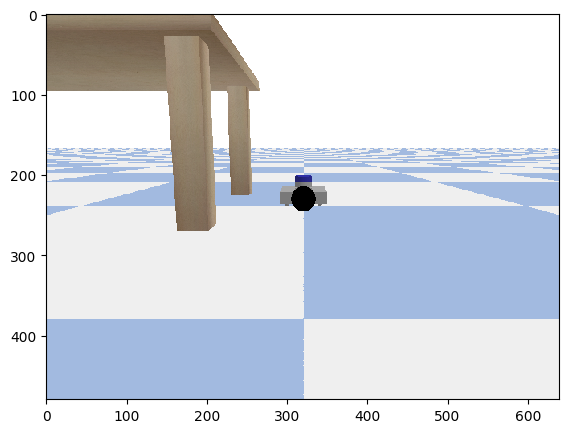

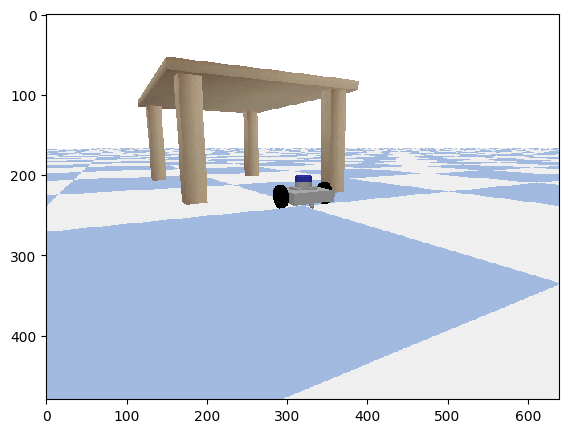

In [6]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -9.8)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 1.5
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")





,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

CPU times: user 501 ms, sys: 30.9 ms, total: 532 ms
Wall time: 517 ms


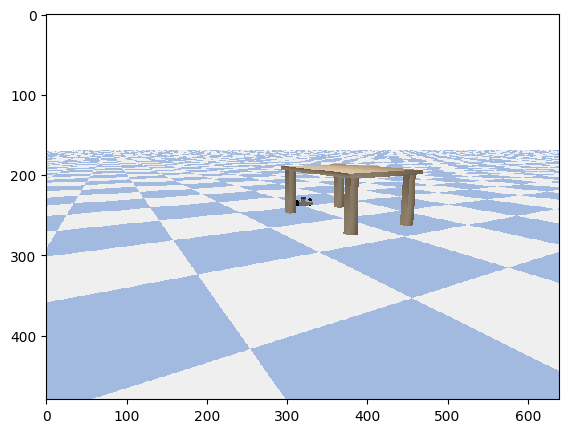

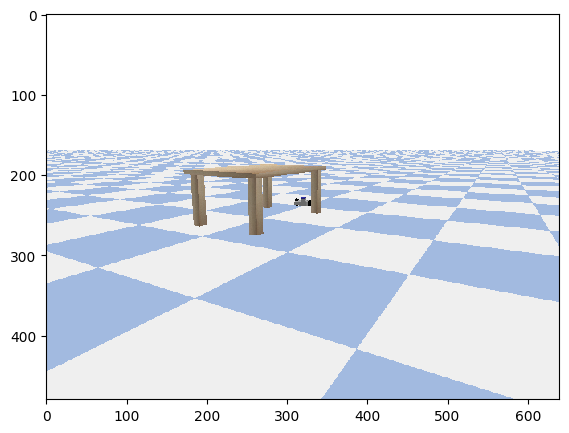

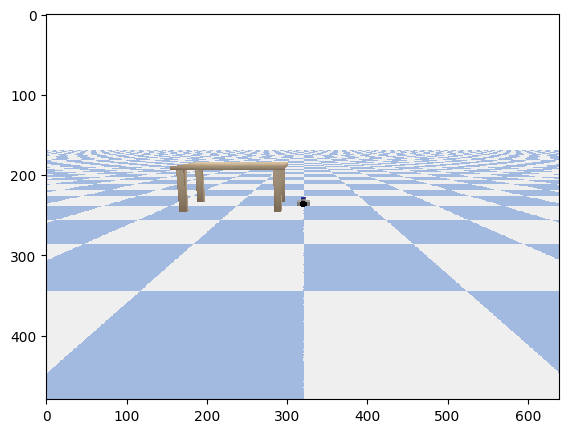

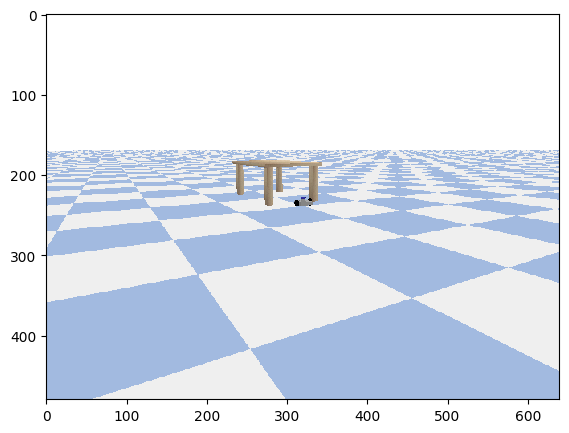

In [7]:
%%time
camTargetPos = [0, 0, 0]  # Camera focuses on the origin
cameraUp = [0, 0, 1]  # Z-axis is up
cameraPos = [0, 0, 1]  # Position of the camera (above the target)
p.setGravity(0, 0, -10)  # Gravity set in the negative Z direction

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab

grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60  # Rotate around the Z-axis for each cell
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0  # Look straight down
      roll = 0
      upAxisIndex = 2
      camDistance = 5  # Distance from the target
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60  # Field of view
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

      img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix, projectionMatrix)
      w = img_arr[0]  # Width of the image, in pixels
      h = img_arr[1]  # Height of the image, in pixels
      rgb = img_arr[2]  # Color data RGB
      dep = img_arr[3]  # Depth data
      print("w=", w, "h=", h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")


# Load the 3d objects (e.g. apples, orange)

## Correct insertion of objects into PyBullet

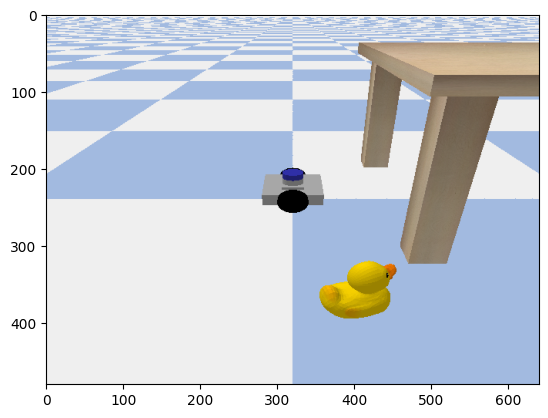

In [8]:
# If PyBullet is not installed:
# !pip install pybullet

import pybullet as p
import pybullet_data
import time
import math

# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)

# Set the path to PyBullet's default data and other parameters
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

# Reset the simulation to a clean state
p.resetSimulation()

# Load a basic plane
plane_id = p.loadURDF("plane.urdf")

# Add gravity
p.setGravity(0, 0, -9.8)

# Load a table
table_pos = [1, 0, 0]
flags = p.URDF_INITIALIZE_SAT_FEATURES
table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

# Initial position/orientation for the robot
init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load the Laikago/diff-drive robot
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

# Step simulation a bit to let objects settle
for _ in range(240):
    p.stepSimulation()

########################################
# Now let's incorporate the "duck" objects
########################################

# Create visual and collision shapes for the duck
shift = [0, -0.02, 0]
meshScale = [0.1, 0.1, 0.1]

visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName="duck.obj",
    rgbaColor=[1, 1, 1, 1],
    specularColor=[0.4, 0.4, 0],
    visualFramePosition=shift,
    meshScale=meshScale
)

collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName="duck_vhacd.obj",
    collisionFramePosition=shift,
    meshScale=meshScale
)

# Create a grid of ducks
rangex = 1
rangey = 1
for i in range(rangex):
    for j in range(rangey):
        p.createMultiBody(
            baseMass=1,
            baseInertialFramePosition=[0, 0, 0],
            baseCollisionShapeIndex=collisionShapeId,
            baseVisualShapeIndex=visualShapeId,
            basePosition=[((-rangex / 2) + i) * meshScale[0] * 2,
                          (-rangey / 2 + j) * meshScale[1] * 2, 1],
            useMaximalCoordinates=True
        )

# Set gravity again (just to be explicit)
p.setGravity(0, 0, -10)

# If you want to run real-time simulation
p.setRealTimeSimulation(1)

# Since we are headless, let's just run the simulation for a bit
# and then capture one image from the camera view
for _ in range(400):
    p.stepSimulation()

# Example of grabbing a camera image:
width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
    width=640,
    height=480,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],
        distance=1.5,
        yaw=0,
        pitch=-30,
        roll=0,
        upAxisIndex=2
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=1.0,
        nearVal=0.1,
        farVal=100.0
    )
)

# img_arr is a numpy array, we can display it in Colab
import matplotlib.pyplot as plt
import numpy as np

rgb_array = np.reshape(img_arr, (height, width, 4))
plt.imshow(rgb_array)
plt.show()

# The simulation will continue to run in the background since we set real-time simulation to 1.
# You can disable real-time and manually step if desired.


## Testing other 3d objects with random camera distance and angle along with random locations of object

Image 1: Pitch=-72.19451271683437, Yaw=318.3467141956883, Distance=1.6774411272438954


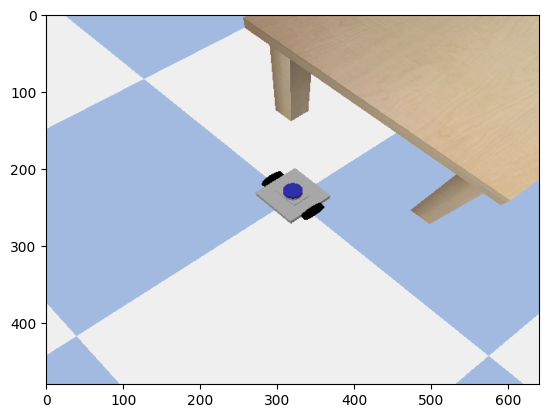

Image 2: Pitch=-21.780077089220583, Yaw=32.490467207104146, Distance=2.4179626320178995


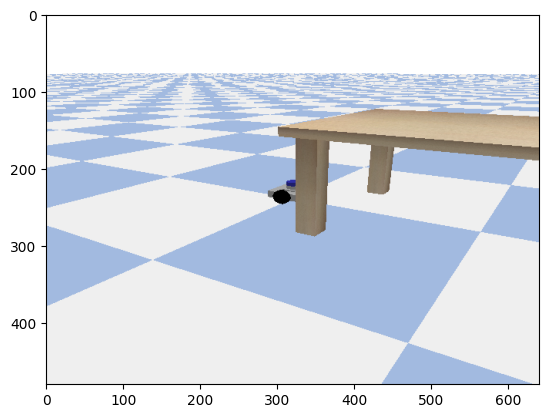

Image 3: Pitch=-87.22457911812045, Yaw=176.24632433221456, Distance=1.8978200418483495


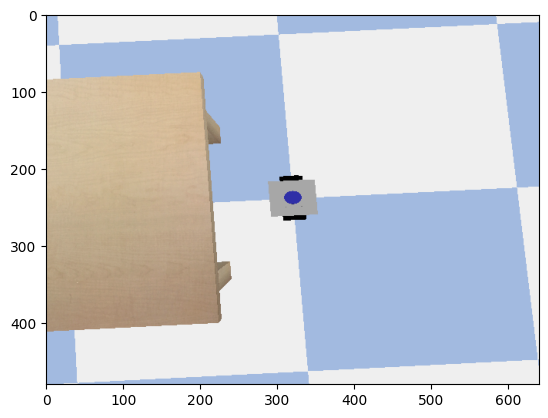

Image 4: Pitch=-52.2756986860731, Yaw=271.63570093496014, Distance=1.7565930605670828


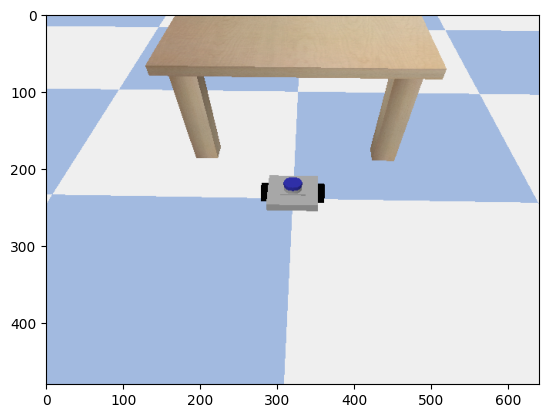

In [9]:
# If PyBullet is not installed:
# !pip install pybullet

import pybullet as p
import pybullet_data
import time
import math

# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)

# Set the path to PyBullet's default data and other parameters
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

# Reset the simulation to a clean state
p.resetSimulation()

# Load a basic plane
plane_id = p.loadURDF("plane.urdf")

# Add gravity
p.setGravity(0, 0, -9.8)

# Load a table
table_pos = [1, 0, 0]
flags = p.URDF_INITIALIZE_SAT_FEATURES
table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

# Initial position/orientation for the robot
init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load the Laikago/diff-drive robot
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

# Step simulation a bit to let objects settle
for _ in range(240):
    p.stepSimulation()

########################################
# Now let's incorporate the "duck" objects
########################################

# Create visual and collision shapes for the duck
shift = [0, 0, 0]
meshScale = [0.001, 0.001, 0.001]

visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/phone.obj",
    rgbaColor=[1, 1, 1, 1],
    specularColor=[0.4, 0.4, 0],
    visualFramePosition=shift,
    meshScale=meshScale
)

collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/phone.obj",
    collisionFramePosition=shift,
    meshScale=meshScale
)



import random
import math

# Create a randomized placement of objects within a radius of 10
num_objects = 3  # Adjust the number of objects as needed

for _ in range(num_objects):
    # Randomize radius and angle for polar coordinates
    random_radius = random.uniform(0, 10)  # Random radius within 0 to 10
    random_angle = random.uniform(0, 2 * math.pi)  # Random angle in radians (0 to 2*pi)

    # Convert polar coordinates to Cartesian coordinates
    x = random_radius * math.cos(random_angle)
    y = random_radius * math.sin(random_angle)

    # Create the object at the randomized position
    p.createMultiBody(
        baseMass=1,
        baseInertialFramePosition=[0, 0, 0],
        baseCollisionShapeIndex=collisionShapeId,
        baseVisualShapeIndex=visualShapeId,
        basePosition=[x, y, 1],  # Randomized x, y, with z=1
        useMaximalCoordinates=True
    )


# Set gravity again (just to be explicit)
p.setGravity(0, 0, -10)

# If you want to run real-time simulation
p.setRealTimeSimulation(1)

# Since we are headless, let's just run the simulation for a bit
# and then capture one image from the camera view
for _ in range(1000):
    p.stepSimulation()


import random

for i in range(4):
    # Generate random pitch between -10 and -90
    random_pitch = random.uniform(-90, -10)

    # Generate random yaw (0 to 360 degrees for full rotation around target)
    random_yaw = random.uniform(0, 360)

    # Generate random distance from the target (e.g., 1 to 5 units)
    random_distance = random.uniform(1, 3)

    # Example of grabbing a camera image:
    width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
        width=640,
        height=480,
        viewMatrix=p.computeViewMatrixFromYawPitchRoll(
            cameraTargetPosition=[0, 0, 0],
            distance=random_distance,
            yaw=random_yaw,
            pitch=random_pitch,
            roll=0,  # Roll can also be randomized if needed
            upAxisIndex=2
        ),
        projectionMatrix=p.computeProjectionMatrixFOV(
            fov=60,
            aspect=1.0,
            nearVal=0.1,
            farVal=100.0
        )
    )

    print(f"Image {i + 1}: Pitch={random_pitch}, Yaw={random_yaw}, Distance={random_distance}")




    # img_arr is a numpy array, we can display it in Colab
    import matplotlib.pyplot as plt
    import numpy as np

    rgb_array = np.reshape(img_arr, (height, width, 4))
    plt.imshow(rgb_array)
    plt.show()

# The simulation will continue to run in the background since we set real-time simulation to 1.
# You can disable real-time and manually step if desired.


## Testing random locations of objects with fixed camera angle

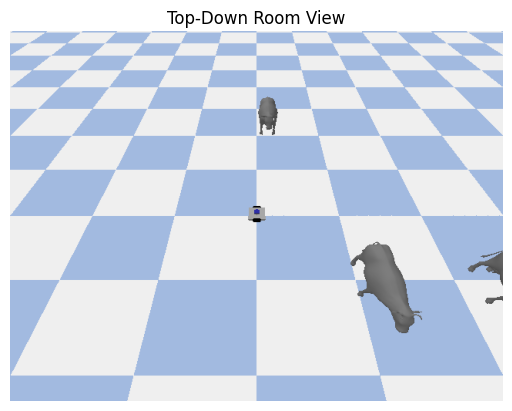

In [10]:
# If PyBullet is not installed:
# !pip install pybullet

import pybullet as p
import pybullet_data
import time
import math

# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)

# Set the path to PyBullet's default data and other parameters
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

# Reset the simulation to a clean state
p.resetSimulation()

# Load a basic plane
plane_id = p.loadURDF("plane.urdf")

# Add gravity
p.setGravity(0, 0, -9.8)

# Load a table
table_pos = [1, 0, 0]
flags = p.URDF_INITIALIZE_SAT_FEATURES
# table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

# Initial position/orientation for the robot
init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load the Laikago/diff-drive robot
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

# Step simulation a bit to let objects settle
for _ in range(240):
    p.stepSimulation()

########################################
# Now let's incorporate the "duck" objects
########################################


texture_id = p.loadTexture("./obj_files/cow_texture.jpg")  # Load the texture

# Create visual and collision shapes for the object like "duck"
shift = [0, 0, 0]
meshScale = [0.01, 0.01, 0.01]

visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/cow.obj",
    rgbaColor=[0.5, 0.5, 0.5, 1],
    specularColor=[0.4, 0.4, 0],
    visualFramePosition=shift,
    meshScale=meshScale
)

collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/cow.obj",
    collisionFramePosition=shift,
    meshScale=meshScale
)

import random
import math

# Create a randomized placement of objects within a radius of 10
num_objects = 3  # Adjust the number of objects as needed

for _ in range(num_objects):
    # Randomize radius and angle for polar coordinates
    random_radius = random.uniform(0, 3)  # Random radius within 0 to 10
    random_angle = random.uniform(0, 2 * math.pi)  # Random angle in radians (0 to 2*pi)

    # Convert polar coordinates to Cartesian coordinates
    x = random_radius * math.cos(random_angle)
    y = random_radius * math.sin(random_angle)

    # Create the object at the randomized position
    objectUniqueId = p.createMultiBody(
        baseMass=1,
        baseInertialFramePosition=[0, 0, 0],
        baseCollisionShapeIndex=collisionShapeId,
        baseVisualShapeIndex=visualShapeId,
        basePosition=[x, y, 1],  # Randomized x, y, with z=1
        useMaximalCoordinates=True
    )

    # Apply the texture to the object
    p.changeVisualShape(objectUniqueId, -1, textureUniqueId=texture_id)


# Set gravity again (just to be explicit)
p.setGravity(0, 0, -10)

# If you want to run real-time simulation
p.setRealTimeSimulation(1)

# Since we are headless, let's just run the simulation for a bit
# and then capture one image from the camera view
for _ in range(1000):
    p.stepSimulation()


import random

# Best camera angle to view the entire room
width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
    width=640,
    height=480,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],  # Focus on the center
        distance=3,  # Slightly larger than the radius
        yaw=0,  # Facing straight forward
        pitch=-60,  # Overhead view, slightly angled
        roll=0,  # No roll for simplicity
        upAxisIndex=2  # Z-axis is up
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=90,  # Wider field of view to capture the full circle
        aspect=1.0,  # Square aspect ratio
        nearVal=0.1,  # Near clipping plane
        farVal=100.0  # Far clipping plane
    )
)

# Example of displaying the image
import matplotlib.pyplot as plt
import numpy as np

rgb_array = np.reshape(img_arr, (height, width, 4))
plt.imshow(rgb_array)
plt.title("Top-Down Room View")
plt.axis("off")
plt.show()

# The simulation will continue to run in the background since we set real-time simulation to 1.
# You can disable real-time and manually step if desired.


In [11]:
%pwd

'/content/drive/MyDrive/GT_Semester3/Deep RL (CS 8803 DRL)/Project/Dataset'

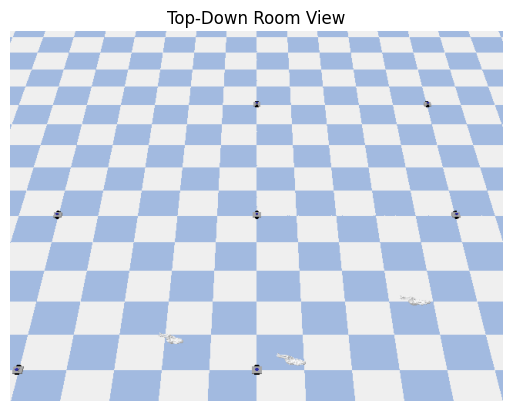

In [12]:
# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)

# Set the path to PyBullet's default data and other parameters
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

# Reset the simulation to a clean state
p.resetSimulation()

# Load a basic plane
plane_id = p.loadURDF("plane.urdf")

# Add gravity
p.setGravity(0, 0, -9.8)

# Load a table
table_pos = [1, 0, 0]
flags = p.URDF_INITIALIZE_SAT_FEATURES
# table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

# Initial position/orientation for the robot
init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load the Laikago/diff-drive robot
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)


check1Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[5,0,0], baseOrientation=init_orientation)
check2Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[5,5,0], baseOrientation=init_orientation)
check3Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[0,5,0], baseOrientation=init_orientation)

check1Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[-5,0,0], baseOrientation=init_orientation)
check2Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[-5,-5,0], baseOrientation=init_orientation)
check3Id = p.loadURDF('diff_drive_robot.urdf', basePosition=[0,-5,0], baseOrientation=init_orientation)

# Step simulation a bit to let objects settle
for _ in range(100):
    p.stepSimulation()

########################################
# Now let's incorporate the "duck" objects
########################################

# Create visual and collision shapes for the object
shift = [0, 0, 0]
meshScale = [0.0005, 0.0005, 0.0005]

visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/woman.obj",  # Ensure the path is correct
    specularColor=[0.4, 0.4, 0],
    visualFramePosition=shift,
    meshScale=meshScale
)

collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName="./obj_files/woman.obj",  # Ensure the path is correct
    collisionFramePosition=shift,
    meshScale=meshScale
)

# Create randomized placement of objects
num_objects = 3  # Adjust as needed
for _ in range(num_objects):
    # Randomize placement
    random_radius = random.uniform(3, 5)
    random_angle = random.uniform(0, 2 * math.pi)
    x = random_radius * math.cos(random_angle)
    y = random_radius * math.sin(random_angle)

    # Rotate the chessboard 180 degrees around the X-axis (to flip it)
    corrected_orientation = p.getQuaternionFromEuler([0, 0, 180])

    # Create the object with corrected orientation
    objectUniqueId = p.createMultiBody(
        baseMass=1,
        baseInertialFramePosition=[0, 0, 0],
        baseCollisionShapeIndex=collisionShapeId,
        baseVisualShapeIndex=visualShapeId,
        basePosition=[x, y, 0],  # Position (no rotation here)
        baseOrientation=corrected_orientation,  # Apply the corrected orientation
        useMaximalCoordinates=True
    )




# Set gravity again (just to be explicit)
p.setGravity(0, 0, -10)

# If you want to run real-time simulation
p.setRealTimeSimulation(1)

# Since we are headless, let's just run the simulation for a bit
# and then capture one image from the camera view
for _ in range(1000):
    p.stepSimulation()


import random

# Best camera angle to view the entire room
width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
    width=640,
    height=480,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],  # Focus on the center
        distance=15,  # Slightly larger than the radius
        yaw=0,  # Facing straight forward
        pitch=-60,  # Overhead view, slightly angled
        roll=0,  # No roll for simplicity
        upAxisIndex=2  # Z-axis is up
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=45,  # Wider field of view to capture the full circle
        aspect=1.0,  # Square aspect ratio
        nearVal=0.1,  # Near clipping plane
        farVal=100.0  # Far clipping plane
    )
)

# Example of displaying the image
import matplotlib.pyplot as plt
import numpy as np

rgb_array = np.reshape(img_arr, (height, width, 4))
plt.imshow(rgb_array)
plt.title("Top-Down Room View")
plt.axis("off")
plt.show()

# The simulation will continue to run in the background since we set real-time simulation to 1.
# You can disable real-time and manually step if desired.



In [13]:
# Soccer ball
# https://github.com/erwincoumans/bullet3/blob/2e1b84487b840084ecf03cd88ccf8d6a2a4522da/examples/pybullet/examples/soccerball.py

## Randomly spawn the obects that are also apart at a certain distance

Placed objects and their positions/orientations:
dog.obj : {'position': [0.8870437256329784, 4.429315768522983, 0], 'orientation_euler': [0, 0, 0.7044119897198649]}
cow.obj : {'position': [2.3001276217035946, 1.9447227443479194, 0], 'orientation_euler': [0, 0, 4.877892734187481]}
house_plant.obj : {'position': [-3.573283966928269, -0.4503879368293801, 0], 'orientation_euler': [0, 0, 5.367287827644648]}
phone.obj : {'position': [-2.594022398481609, 1.7342762140354198, 0], 'orientation_euler': [0, 0, 2.2775925550489324]}


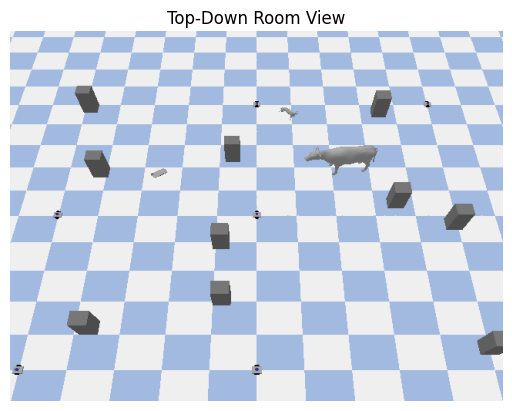

In [14]:
import pybullet as p
import pybullet_data
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)

# Set the path to PyBullet's default data and other parameters
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

# Reset the simulation to a clean state
p.resetSimulation()

# Load a basic plane
plane_id = p.loadURDF("plane.urdf")

# Add gravity
p.setGravity(0, 0, -9.8)

# Optionally load a table or other environment objects if needed
# table_pos = [1, 0, 0]
# flags = p.URDF_INITIALIZE_SAT_FEATURES
# table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

# Initial position/orientation for the robot (if you want a reference robot)
init_pos = [0, 0, 0]
init_orientation = p.getQuaternionFromEuler([0, 0, 0])

# Load a reference robot (optional)
robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

# You can also place checkpoints or other reference URDFs if desired
checkpoints = [
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [-5, 0, 0],
    [-5, -5, 0],
    [0, -5, 0]
]
for cp in checkpoints:
    p.loadURDF('diff_drive_robot.urdf', basePosition=cp, baseOrientation=init_orientation)

# Step simulation a bit to let objects settle
for _ in range(100):
    p.stepSimulation()


########################################
# Load multiple unique 3D OBJ models in the environment
########################################

obj_files = ["dog.obj", "cow.obj", "house_plant.obj", "phone.obj"]
base_path = "./obj_files/"  # Adjust this path as needed
meshScale = [0.02, 0.02, 0.02]  # Scale for all models

object_positions = {}  # Dictionary to store the placed objects and their positions
min_distance = 1  # Minimum distance between objects

for obj_file in obj_files:
    while True:
        # Randomize placement: a radius and angle for position
        random_radius = random.uniform(3, 5)
        random_angle = random.uniform(0, 2 * math.pi)
        x = random_radius * math.cos(random_angle)
        y = random_radius * math.sin(random_angle)

        # Check the distance from all previously placed objects
        valid_position = True
        for _, info in object_positions.items():
            existing_x, existing_y, _ = info["position"]
            distance = math.sqrt((x - existing_x)**2 + (y - existing_y)**2)
            if distance < min_distance:
                valid_position = False
                break

        # If the position is valid, break the loop and place the object
        if valid_position:
            break

    # Randomize orientation around the z-axis (yaw) to keep it upright
    random_yaw = random.uniform(0, 2 * math.pi)
    orientation = p.getQuaternionFromEuler([0, 0, random_yaw])

    if obj_file == "phone.obj":
      meshScale = [0.002, 0.002, 0.002]
    else:
      meshScale = [0.02, 0.02, 0.02]
    # Create visual and collision shapes
    visualShapeId = p.createVisualShape(
        shapeType=p.GEOM_MESH,
        fileName=base_path + obj_file,
        specularColor=[0.1, 0.1, 0.1],
        visualFramePosition=[0, 0, 0],
        meshScale=meshScale
    )

    collisionShapeId = p.createCollisionShape(
        shapeType=p.GEOM_MESH,
        fileName=base_path + obj_file,
        collisionFramePosition=[0, 0, 0],
        meshScale=meshScale
    )

        # After creating the multi-body
    objectUniqueId = p.createMultiBody(
        baseMass=1,
        baseInertialFramePosition=[0, 0, 0],
        baseCollisionShapeIndex=collisionShapeId,
        baseVisualShapeIndex=visualShapeId,
        basePosition=[x, y, 0],
        baseOrientation=orientation,
        useMaximalCoordinates=True
    )

    # Override the visual appearance with a uniform color
    p.changeVisualShape(
        objectUniqueId,
        linkIndex=-1,  # Base link
        rgbaColor=[0.7, 0.7, 0.7, 1.0]  # Dark grey with full opacity
    )


    # Store the random position and orientation for reference
    object_positions[obj_file] = {
        "position": [x, y, 0],
        "orientation_euler": [0, 0, random_yaw]
    }

# Set gravity again (just to be explicit)
p.setGravity(0, 0, -10)

# You can print out the object positions for confirmation
print("Placed objects and their positions/orientations:")
for obj_name, info in object_positions.items():
    print(obj_name, ":", info)






# Run the simulation for a bit
########################################
# Insert random barriers as blocks
########################################
num_barriers = 10
barrier_positions = []

for _ in range(num_barriers):
    while True:
        # Randomize placement for barriers
        random_x = random.uniform(-5, 5)
        random_y = random.uniform(-5, 5)

        # Ensure barriers are not too close to each other or other objects
        valid_position = True
        for barrier_pos in barrier_positions:
            if math.sqrt((random_x - barrier_pos[0])**2 + (random_y - barrier_pos[1])**2) < min_distance:
                valid_position = False
                break

        for _, info in object_positions.items():
            existing_x, existing_y, _ = info["position"]
            if math.sqrt((random_x - existing_x)**2 + (random_y - existing_y)**2) < min_distance:
                valid_position = False
                break

        if valid_position:
            break

    # Store the position of the barrier
    barrier_positions.append([random_x, random_y])

    # Create the barrier (block)
    barrier_id = p.createMultiBody(
        baseMass=0,
        baseInertialFramePosition=[0, 0, 0],
        baseCollisionShapeIndex=p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5]),
        baseVisualShapeIndex=p.createVisualShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5], rgbaColor=[0.5, 0.5, 0.5, 1.0]),
        basePosition=[random_x, random_y, 0.5],  # Set z to 0.5 so the block is above the plane
        baseOrientation=p.getQuaternionFromEuler([0, 0, 0])
    )




# Run the simulation for a bit
for _ in range(100):
    p.stepSimulation()

# Get a camera image (top-down view)
width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
    width=640,
    height=480,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],  # Focus on the center
        distance=15,  # Slightly larger than the radius
        yaw=0,        # Facing straight forward
        pitch=-60,    # Overhead view, slightly angled
        roll=0,       # No roll for simplicity
        upAxisIndex=2 # Z-axis is up
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=45,        # Wider field of view
        aspect=1.0,    # Square aspect ratio
        nearVal=0.1,   # Near clipping plane
        farVal=100.0   # Far clipping plane
    )
)

rgb_array = np.reshape(img_arr, (height, width, 4))
plt.imshow(rgb_array)
plt.title("Top-Down Room View")
plt.axis("off")
plt.show()

# The simulation continues to run in real-time simulation mode if you wish.
p.setRealTimeSimulation(1)


In [15]:
object_positions

{'dog.obj': {'position': [0.8870437256329784, 4.429315768522983, 0],
  'orientation_euler': [0, 0, 0.7044119897198649]},
 'cow.obj': {'position': [2.3001276217035946, 1.9447227443479194, 0],
  'orientation_euler': [0, 0, 4.877892734187481]},
 'house_plant.obj': {'position': [-3.573283966928269, -0.4503879368293801, 0],
  'orientation_euler': [0, 0, 5.367287827644648]},
 'phone.obj': {'position': [-2.594022398481609, 1.7342762140354198, 0],
  'orientation_euler': [0, 0, 2.2775925550489324]}}

## Generate Dataset

In [16]:
# import pybullet as p
# import pybullet_data
# import math
# import random
# import matplotlib.pyplot as plt
# import numpy as np
# import csv
# import os

# # Number of iterations
# num_iterations = 1000

# # Directory to save images
# image_save_dir = "images"
# os.makedirs(image_save_dir, exist_ok=True)

# # CSV file to store object positions
# csv_filename = "object_positions.csv"

# # Prepare CSV file with headers
# with open(csv_filename, mode='w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["iteration", "object_name", "x", "y", "yaw"])

# # Connect in DIRECT mode (no GUI)
# p.connect(p.DIRECT)
# p.setAdditionalSearchPath(pybullet_data.getDataPath())

# for i in range(num_iterations):
#     # Reset the simulation for each iteration
#     p.resetSimulation()
#     p.setPhysicsEngineParameter(numSolverIterations=10)
#     p.setTimeStep(1.0 / 120.0)

#     # Load a basic plane
#     plane_id = p.loadURDF("plane.urdf")

#     # Add gravity
#     p.setGravity(0, 0, -9.8)

#     # Optionally load a table or other environment objects if needed
#     # table_pos = [1, 0, 0]
#     # flags = p.URDF_INITIALIZE_SAT_FEATURES
#     # table = p.loadURDF("table/table.urdf", table_pos, flags=flags, useFixedBase=True)

#     # Initial position/orientation for the robot (if you want a reference robot)
#     init_pos = [0, 0, 0]
#     init_orientation = p.getQuaternionFromEuler([0, 0, 0])

#     # Load a reference robot (optional)
#     robotId = p.loadURDF('diff_drive_robot.urdf', basePosition=init_pos, baseOrientation=init_orientation)

#     # You can also place checkpoints or other reference URDFs if desired
#     checkpoints = [
#         [5, 0, 0],
#         [5, 5, 0],
#         [0, 5, 0],
#         [-5, 0, 0],
#         [-5, -5, 0],
#         [0, -5, 0]
#     ]
#     for cp in checkpoints:
#         p.loadURDF('diff_drive_robot.urdf', basePosition=cp, baseOrientation=init_orientation)

#     # Step simulation to let objects settle
#     for _ in range(100):
#         p.stepSimulation()

#     ########################################
#     # Load multiple unique 3D OBJ models in the environment
#     ########################################

#     obj_files = ["dog.obj", "cow.obj", "phone.obj"]
#     base_path = "./obj_files/"  # Adjust this path as needed
#     meshScale = [0.02, 0.02, 0.02]  # Default scale for models

#     object_positions = {}  # Dictionary to store placed objects and their positions
#     min_distance = 1  # Minimum distance between objects

#     for obj_file in obj_files:
#         while True:
#             # Randomize placement: a radius and angle for position
#             random_radius = random.uniform(3, 5)
#             random_angle = random.uniform(0, 2 * math.pi)
#             x = random_radius * math.cos(random_angle)
#             y = random_radius * math.sin(random_angle)

#             # Check distance from previously placed objects
#             valid_position = True
#             for _, info in object_positions.items():
#                 existing_x, existing_y, _ = info["position"]
#                 distance = math.sqrt((x - existing_x)**2 + (y - existing_y)**2)
#                 if distance < min_distance:
#                     valid_position = False
#                     break

#             # If valid, place object
#             if valid_position:
#                 break

#         # Randomize orientation around z-axis
#         random_yaw = random.uniform(0, 2 * math.pi)
#         orientation = p.getQuaternionFromEuler([0, 0, random_yaw])

#         # Adjust scale if it's the phone object
#         if obj_file == "phone.obj":
#             meshScale = [0.002, 0.002, 0.002]
#         else:
#             meshScale = [0.02, 0.02, 0.02]

#         # Create visual and collision shapes
#         visualShapeId = p.createVisualShape(
#             shapeType=p.GEOM_MESH,
#             fileName=base_path + obj_file,
#             specularColor=[0.1, 0.1, 0.1],
#             visualFramePosition=[0, 0, 0],
#             meshScale=meshScale
#         )

#         collisionShapeId = p.createCollisionShape(
#             shapeType=p.GEOM_MESH,
#             fileName=base_path + obj_file,
#             collisionFramePosition=[0, 0, 0],
#             meshScale=meshScale
#         )

#         objectUniqueId = p.createMultiBody(
#             baseMass=1,
#             baseInertialFramePosition=[0, 0, 0],
#             baseCollisionShapeIndex=collisionShapeId,
#             baseVisualShapeIndex=visualShapeId,
#             basePosition=[x, y, 0],
#             baseOrientation=orientation,
#             useMaximalCoordinates=True
#         )

#         # Override the visual appearance
#         p.changeVisualShape(
#             objectUniqueId,
#             linkIndex=-1,  # Base link
#             rgbaColor=[0.7, 0.7, 0.7, 1.0]
#         )

#         # Store the position and orientation
#         object_positions[obj_file] = {
#             "position": [x, y, 0],
#             "orientation_euler": [0, 0, random_yaw]
#         }

#     # Set gravity again (just to be explicit)
#     p.setGravity(0, 0, -10)

#     # Insert random barriers
#     num_barriers = 10
#     barrier_positions = []
#     for _ in range(num_barriers):
#         while True:
#             # Random barrier placement
#             random_x = random.uniform(-5, 5)
#             random_y = random.uniform(-5, 5)

#             # Validate barrier position
#             valid_position = True
#             for barrier_pos in barrier_positions:
#                 if math.sqrt((random_x - barrier_pos[0])**2 + (random_y - barrier_pos[1])**2) < min_distance:
#                     valid_position = False
#                     break

#             for _, info in object_positions.items():
#                 existing_x, existing_y, _ = info["position"]
#                 if math.sqrt((random_x - existing_x)**2 + (random_y - existing_y)**2) < min_distance:
#                     valid_position = False
#                     break

#             if valid_position:
#                 break

#         barrier_positions.append([random_x, random_y])
#         # Create the barrier (block)
#         p.createMultiBody(
#             baseMass=0,
#             baseInertialFramePosition=[0, 0, 0],
#             baseCollisionShapeIndex=p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5]),
#             baseVisualShapeIndex=p.createVisualShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5], rgbaColor=[0.5, 0.5, 0.5, 1.0]),
#             basePosition=[random_x, random_y, 0.5],
#             baseOrientation=p.getQuaternionFromEuler([0, 0, 0])
#         )

#     # Run the simulation a bit
#     for _ in range(100):
#         p.stepSimulation()

#     # Capture camera image
#     width, height, img_arr, depth_arr, seg_arr = p.getCameraImage(
#         width=640,
#         height=480,
#         viewMatrix=p.computeViewMatrixFromYawPitchRoll(
#             cameraTargetPosition=[0, 0, 0],  # Focus on the center
#             distance=15,
#             yaw=0,
#             pitch=-60,
#             roll=0,
#             upAxisIndex=2
#         ),
#         projectionMatrix=p.computeProjectionMatrixFOV(
#             fov=45,
#             aspect=1.0,
#             nearVal=0.1,
#             farVal=100.0
#         )
#     )

#     rgb_array = np.reshape(img_arr, (height, width, 4))

#     # Save the image
#     image_filename = os.path.join(image_save_dir, f"image_{i}.png")
#     plt.imsave(image_filename, rgb_array)

#     # Save object positions to CSV
#     with open(csv_filename, mode='a', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         for obj_name, info in object_positions.items():
#             x, y, z = info["position"]
#             _, _, yaw = info["orientation_euler"]
#             writer.writerow([i, obj_name, x, y, yaw])

# # After completing all iterations
# p.setRealTimeSimulation(1)
# p.disconnect()


In [20]:
import pybullet as p
import pybullet_data
import math
import random
import numpy as np
import imageio
import csv
import os

# Number of iterations
num_iterations = 10000

# Directory to save images
image_save_dir = "images"
os.makedirs(image_save_dir, exist_ok=True)

# Connect in DIRECT mode (no GUI)
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Common camera parameters
cam_target = [0, 0, 0]
cam_distance = 15
cam_yaw = 0
cam_pitch = -60
cam_roll = 0
cam_upAxisIndex = 2
width = 1280
height = 960

view_matrix = p.computeViewMatrixFromYawPitchRoll(
    cameraTargetPosition=cam_target,
    distance=cam_distance,
    yaw=cam_yaw,
    pitch=cam_pitch,
    roll=cam_roll,
    upAxisIndex=cam_upAxisIndex
)

projection_matrix = p.computeProjectionMatrixFOV(
    fov=45,
    aspect=1.0,
    nearVal=0.1,
    farVal=100.0
)

obj_files = ["dog.obj", "beach_ball.obj", "cow.obj", "pineapple.obj", "cat.obj"]
base_path = "./obj_files/"  # Adjust if needed
min_distance = 1  # Minimum distance between objects
num_barriers = 10

# Collect all data in memory first for speed
all_data = []  # Each entry: [iteration, object_name, x, y]

for i in range(num_iterations):
    # Reset simulation each iteration
    p.resetSimulation()
    p.setPhysicsEngineParameter(numSolverIterations=10)
    p.setTimeStep(1.0 / 120.0)
    p.setGravity(0, 0, -9.8)

    # Load a plane
    p.loadURDF("plane.urdf")

    # Randomize and load one robot
    robot_x = random.uniform(-2, 2)
    robot_y = random.uniform(-2, 2)
    robot_init_orientation = p.getQuaternionFromEuler([0, 0, random.uniform(0, 2*math.pi)])
    p.loadURDF(
        'diff_drive_robot.urdf',
        basePosition=[robot_x, robot_y, 0],
        baseOrientation=robot_init_orientation
    )

    # Randomly place objects
    object_positions = {}
    for obj_file in obj_files:
        while True:
            # Randomize placement
            random_radius = random.uniform(3, 5)
            random_angle = random.uniform(0, 2 * math.pi)
            x = random_radius * math.cos(random_angle)
            y = random_radius * math.sin(random_angle)

            # Check distance to previously placed objects
            valid_position = True
            for _, info in object_positions.items():
                existing_x, existing_y = info["position"]
                distance = math.sqrt((x - existing_x)**2 + (y - existing_y)**2)
                if distance < min_distance:
                    valid_position = False
                    break

            if valid_position:
                break

        # Adjust scale if it's the phone
        if obj_file == "cat.obj":
            meshScale = [0.01, 0.01, 0.01]
        elif obj_file == "beach_ball.obj":
            meshScale = [0.01, 0.01, 0.01]
        else:
            meshScale = [0.02, 0.02, 0.02]

        # Create object
        visualShapeId = p.createVisualShape(
            shapeType=p.GEOM_MESH,
            fileName=base_path + obj_file,
            specularColor=[0.1, 0.1, 0.1],
            visualFramePosition=[0, 0, 0],
            meshScale=meshScale
        )

        collisionShapeId = p.createCollisionShape(
            shapeType=p.GEOM_MESH,
            fileName=base_path + obj_file,
            collisionFramePosition=[0, 0, 0],
            meshScale=meshScale
        )

        objectUniqueId = p.createMultiBody(
            baseMass=1,
            baseInertialFramePosition=[0, 0, 0],
            baseCollisionShapeIndex=collisionShapeId,
            baseVisualShapeIndex=visualShapeId,
            basePosition=[x, y, 0],
            baseOrientation=p.getQuaternionFromEuler([0, 0, random.uniform(0, 2*math.pi)]),
            useMaximalCoordinates=True
        )

        # Optional: change visual shape color if needed
        p.changeVisualShape(
            objectUniqueId,
            linkIndex=-1,
            rgbaColor=[0.7, 0.7, 0.7, 1.0]
        )

        # Store position (just x,y)
        object_positions[obj_file] = {
            "position": (x, y)
        }

    # Insert random barriers
    barrier_positions = []
    for _ in range(num_barriers):
        while True:
            random_x = random.uniform(-5, 5)
            random_y = random.uniform(-5, 5)
            valid_position = True

            # Check against barriers
            for bx, by in barrier_positions:
                if math.sqrt((random_x - bx)**2 + (random_y - by)**2) < min_distance:
                    valid_position = False
                    break

            # Check against objects
            for _, info in object_positions.items():
                existing_x, existing_y = info["position"]
                if math.sqrt((random_x - existing_x)**2 + (random_y - existing_y)**2) < min_distance:
                    valid_position = False
                    break

            if valid_position:
                break

        barrier_positions.append((random_x, random_y))
        p.createMultiBody(
            baseMass=0,
            baseInertialFramePosition=[0, 0, 0],
            baseCollisionShapeIndex=p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5]),
            baseVisualShapeIndex=p.createVisualShape(p.GEOM_BOX, halfExtents=[0.2, 0.2, 0.5], rgbaColor=[0.5, 0.5, 0.5, 1.0]),
            basePosition=[random_x, random_y, 0.5],
            baseOrientation=p.getQuaternionFromEuler([0, 0, 0])
        )

    # Minimal simulation steps to allow objects to settle (tune this as needed)
    for _ in range(10):
        p.stepSimulation()

    # Capture camera image with GPU renderer if available
    _, _, img_arr, _, _ = p.getCameraImage(
        width=width,
        height=height,
        viewMatrix=view_matrix,
        projectionMatrix=projection_matrix,
        renderer=p.ER_BULLET_HARDWARE_OPENGL
    )

    rgb_array = np.reshape(img_arr, (height, width, 4))

    # Save the image
    image_filename = os.path.join(image_save_dir, f"image_{i}.png")
    imageio.imwrite(image_filename, rgb_array)

    # Store object positions
    for obj_name, info in object_positions.items():
        x, y = info["position"]
        all_data.append([i, obj_name, x, y])

# After all iterations, write out CSV once
csv_filename = "object_positions.csv"
with open(csv_filename, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["iteration", "object_name", "x", "y"])
    for row in all_data:
        writer.writerow(row)

p.disconnect()


In [18]:
# import pybullet as p
# import pybullet_data
# import math
# import random
# import numpy as np
# import imageio
# import cv2
# import csv
# import os

# # Increase these slightly for smoother rendering
# high_width = 1280
# high_height = 960
# final_width = 640
# final_height = 480

# view_matrix = p.computeViewMatrixFromYawPitchRoll(
#     cameraTargetPosition=[0, 0, 0],
#     distance=15,
#     yaw=0,
#     pitch=-60,
#     roll=0,
#     upAxisIndex=2
# )

# projection_matrix = p.computeProjectionMatrixFOV(
#     fov=45,
#     aspect=high_width / high_height,
#     nearVal=0.1,
#     farVal=100.0
# )

# # Assume you have your simulation loop and object placement here...
# # Just showing the camera capture and image saving part:

# # Capture the high-res image
# _, _, img_arr, _, _ = p.getCameraImage(
#     width=high_width,
#     height=high_height,
#     viewMatrix=view_matrix,
#     projectionMatrix=projection_matrix,
#     renderer=p.ER_BULLET_HARDWARE_OPENGL  # GPU acceleration
# )

# rgb_array = np.reshape(img_arr, (high_height, high_width, 4))

# # Downsample the image to final resolution for smoothing
# smooth_rgb = cv2.resize(rgb_array, (final_width, final_height), interpolation=cv2.INTER_AREA)

# # Save the resulting smoother image
# imageio.imwrite("smoothed_image.png", smooth_rgb)
